# About Dataset

## Predict Behavior to Retain Customers

### Content

- Each row represents a customer, and each column contains customer attributes described in the column metadata.

- The dataset includes information about:

  - **Churn:** Customers who left within the last month (column name: `Churn`).  
  - **Services:** The services each customer has signed up for, including phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV/movies.  
  - **Customer Account Information:** Details such as tenure, contract type, payment method, paperless billing, monthly charges, and total charges.  
  - **Demographic Information:** Customer details like gender, age range, and whether they have partners or dependents.  

### Inspiration  

[Dataset URL](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)


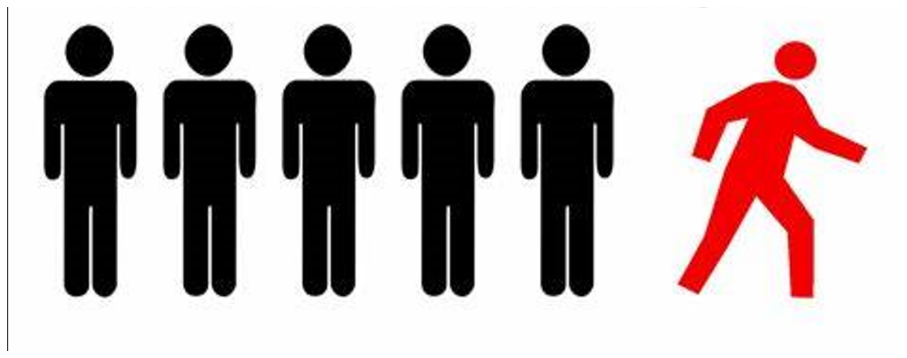

In [127]:
from scipy.stats import ttest_ind
import cv2
import matplotlib.pyplot as plt
image_path = r"D:\ppppppp.png"  
im = cv2.imread(image_path)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16, 10))  
plt.imshow(im)
plt.axis("off") 
plt.show()

# Import the Libraries

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

# Data Analysis & Visualization

In [129]:
df = pd.read_csv(r'D:\desctop\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [130]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [131]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [133]:
df.duplicated().sum()

0

In [134]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [135]:
df.shape

(7043, 21)

In [136]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

customerID: 7043 unique values
gender: 2 unique values
SeniorCitizen: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
tenure: 73 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
MonthlyCharges: 1585 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


In [137]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [138]:
for col in df.columns:
    print(col)

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [139]:
fig1 = px.bar(df, x=df["Churn"].value_counts().index, y=df["Churn"].value_counts().values,color=df["Churn"].value_counts().index, title="Customer Churn Distribution",labels={"x": "Churn", "y": "Customer Count"})
fig1.show()

In [140]:
fig = px.bar(df, x="Contract", color="Churn", title="Impact of Contract Type on Churn", barmode="group" ,color_discrete_map={'Yes': 'red', 'No': 'blue'})
fig.update_layout(xaxis_title="Contract Type", yaxis_title="Count of Customers",legend_title="Churn Status")

fig.show()

In [141]:
fig = px.histogram(df, x="tenure", color="Churn", title="Tenure Distribution by Churn", nbins=50, barmode="overlay")

fig.show()

In [142]:
fig = px.box(df, x="Churn", y="MonthlyCharges", title="Monthly Charges vs Churn")

fig.show()

In [143]:
fig4 = px.pie(df, names="Contract", title="Customer Distribution by Contract Type",color_discrete_sequence=px.colors.sequential.RdBu)
fig4.show()

In [144]:
df_grouped = df.groupby("tenure")["MonthlyCharges"].mean().reset_index()
fig5 = px.line(df_grouped, x="tenure", y="MonthlyCharges",title="Average Monthly Charges Over Tenure",labels={"tenure": "Tenure (Months)", "MonthlyCharges": "Avg Monthly Charges"})
fig5.show()

# Data Cleaning & Preprocessing

In [145]:
df.drop(columns=["customerID", "gender", "PhoneService", "TotalCharges"], inplace=True)

In [146]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE

In [147]:
binary_cols = ["SeniorCitizen", "Partner", "Dependents", "PaperlessBilling", "Churn"]
label_encoder = LabelEncoder()
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [148]:
multi_categorical_cols = [
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaymentMethod"
]
df = pd.get_dummies(df, columns=multi_categorical_cols, drop_first=True)

In [149]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [150]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Churn"] = y_resampled

In [151]:
from sklearn.preprocessing import StandardScaler

df_resampled = df_resampled.astype(int)

scaler = StandardScaler()
df_resampled[["tenure", "MonthlyCharges"]] = scaler.fit_transform(df_resampled[["tenure", "MonthlyCharges"]])

In [152]:
df_resampled.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,-1.114814,1,-1.341540,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0.261186,0,-0.402937,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,-1.073117,1,-0.507226,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0.719853,0,-0.889620,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,-1.073117,1,0.083747,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [153]:
numerical_cols = ["tenure", "MonthlyCharges"]

Q1 = df_resampled[numerical_cols].quantile(0.25)
Q3 = df_resampled[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_resampled[numerical_cols] < (Q1 - 1.5 * IQR)) | 
            (df_resampled[numerical_cols] > (Q3 + 1.5 * IQR)))

print(outliers.sum())

tenure            0
MonthlyCharges    0
dtype: int64


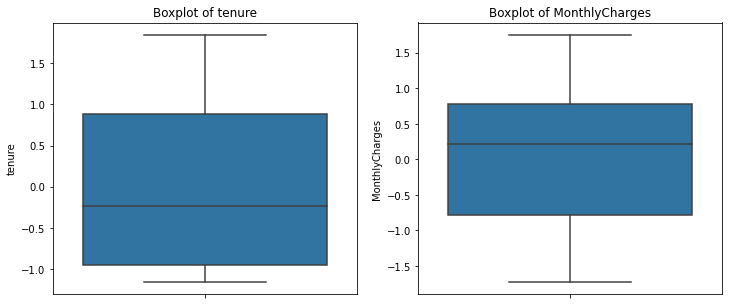

In [154]:
plt.figure(figsize=(12, 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df_resampled[col])
    plt.title(f"Boxplot of {col}")

plt.show()

# Feature Engineering

In [155]:
df_resampled['tenure_category'] = pd.cut(df_resampled['tenure'], 
                                         bins=[-1, 12, 36, 72], 
                                         labels=['Short-term', 'Mid-term', 'Long-term'])

df_resampled['PaymentRatio'] = df_resampled['MonthlyCharges'] / (df_resampled['tenure'] + 1)

print(df_resampled[['tenure', 'tenure_category', 'MonthlyCharges', 'PaymentRatio']].head())

     tenure tenure_category  MonthlyCharges  PaymentRatio
0 -1.114814             NaN       -1.341540     11.684500
1  0.261186      Short-term       -0.402937     -0.319490
2 -1.073117             NaN       -0.507226      6.937213
3  0.719853      Short-term       -0.889620     -0.517265
4 -1.073117             NaN        0.083747     -1.145382


In [156]:
df_resampled['MonthlyCharges_log'] = np.log1p(df_resampled['MonthlyCharges'])

C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

invalid value encountered in log1p



In [157]:
df_resampled['TotalServices'] = (
    df_resampled[['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 
                  'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']]
    .sum(axis=1)
)

df_resampled['Contract_Paperless'] = df_resampled['Contract_One year'] + df_resampled['Contract_Two year'] * df_resampled['PaperlessBilling']

In [158]:
if 'MonthlyCharges_log' not in X.columns:
    X['MonthlyCharges_log'] = np.log1p(X['MonthlyCharges'])
X['MonthlyCharges_log'].fillna(X['MonthlyCharges_log'].median(), inplace=True)

if 'tenure_category' not in X.columns:
    X['tenure_category'] = pd.cut(X['tenure'], bins=[0, 12, 24, 36, 48, 60, np.inf], labels=False)
X['tenure_category'].fillna(X['tenure_category'].mode()[0], inplace=True)

X["tenure_category"] = X["tenure_category"].astype("category")
X["tenure_category"] = X["tenure_category"].cat.codes

# Feature Engineering

In [159]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Top Featured:", selected_features)

Top Featured: Index(['tenure', 'InternetService_Fiber optic', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'tenure_category'],
      dtype='object')


In [160]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [161]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(5).index
print("Top Features (RandomForest Importance):", top_features)

Top Features (RandomForest Importance): Index(['tenure', 'MonthlyCharges', 'MonthlyCharges_log', 'tenure_category',
       'InternetService_Fiber optic'],
      dtype='object')


In [162]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

In [163]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [6.55234597e-01 3.42543692e-01 3.93336254e-04 2.31819699e-04
 1.84299052e-04]


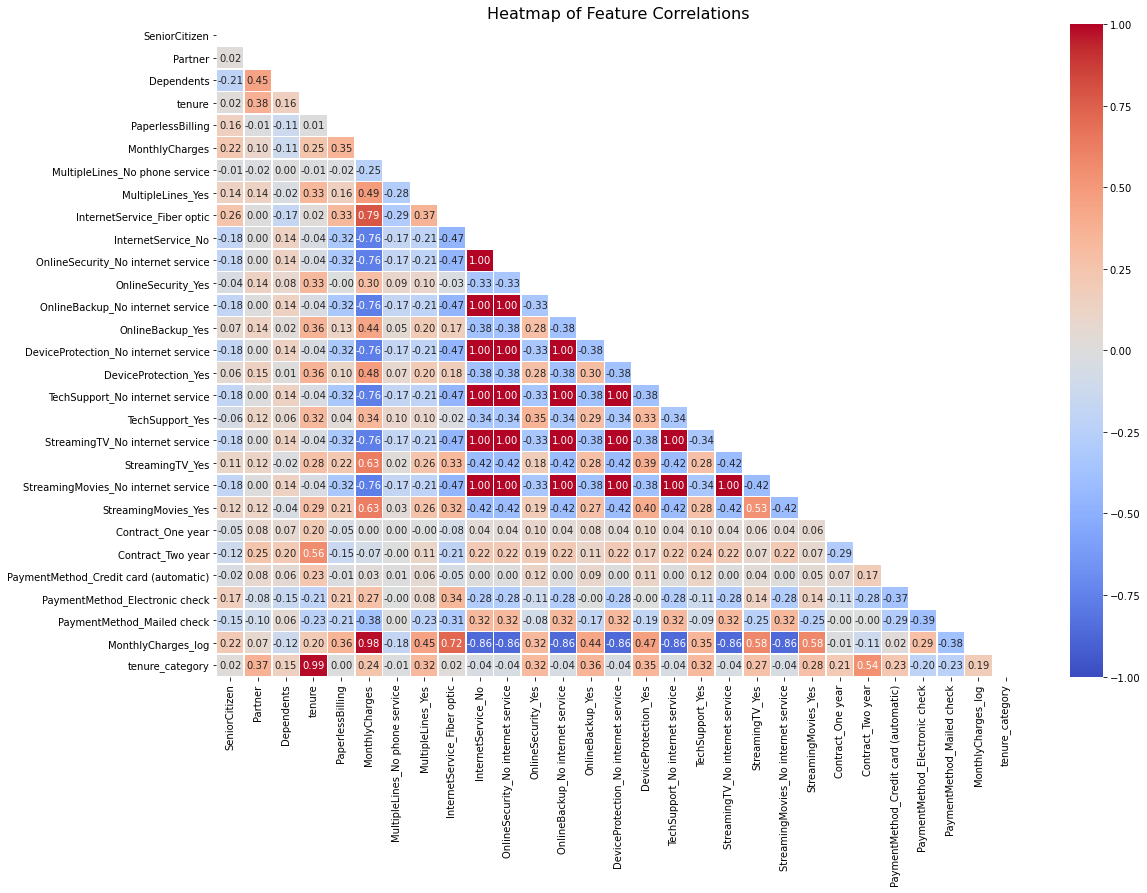

In [164]:
correlation_matrix = X.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Heatmap of Feature Correlations", fontsize=16)
plt.show()

# Data Splitting

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [166]:
selected_features = ['tenure', 'PaymentMethod_Electronic check', 'PaymentRatio', 'InternetService_Fiber optic', 'Contract_Two year']
target = 'Churn'

In [167]:
X = df_resampled[selected_features]
y = df_resampled['Churn']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [169]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection

In [170]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [171]:
y_pred_log = log_model.predict(X_test)

In [172]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7516908212560387
Confusion Matrix:
 [[762 273]
 [241 794]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1035
           1       0.74      0.77      0.76      1035

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070



In [173]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [174]:
y_pred_dt = dt_model.predict(X_test)

In [175]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7869565217391304
Confusion Matrix:
 [[781 254]
 [187 848]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78      1035
           1       0.77      0.82      0.79      1035

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



In [176]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [177]:
y_pred_rf = rf_model.predict(X_test)

In [178]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.797584541062802
Confusion Matrix:
 [[766 269]
 [150 885]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79      1035
           1       0.77      0.86      0.81      1035

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



In [179]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [180]:
y_pred_svm = svm_model.predict(X_test)

In [181]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7772946859903381
Confusion Matrix:
 [[751 284]
 [177 858]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77      1035
           1       0.75      0.83      0.79      1035

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



# Model Evaluation

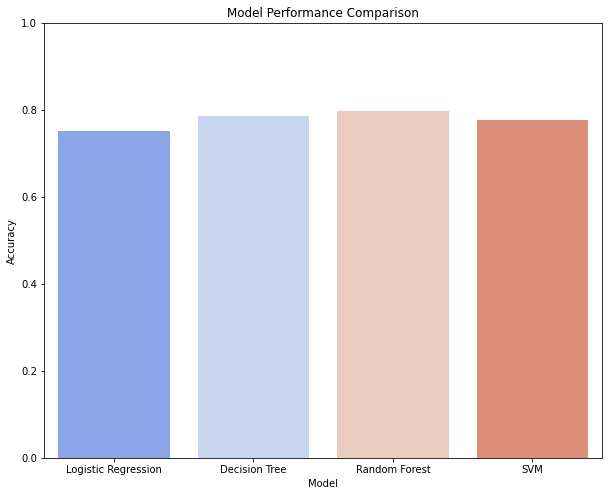

In [182]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

plt.figure(figsize=(10, 8))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()

# Model Optimization

In [183]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)

In [184]:
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20, 
    cv=5,       
    verbose=2,
    n_jobs=-1,  
    random_state=42
)

random_search.fit(X_train, y_train)

print(" Best parameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': True}


In [185]:
best_rf_model = random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

In [186]:
print("Random Forest (After Optimization) Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))

Random Forest (After Optimization) Accuracy: 0.8024154589371981
Confusion Matrix:
 [[770 265]
 [144 891]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79      1035
           1       0.77      0.86      0.81      1035

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



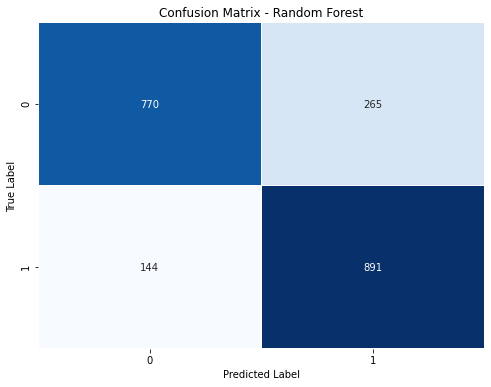

In [187]:
cm = confusion_matrix(y_test, y_pred_best_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", linewidths=0.5, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Deep Learning Pipeline

In [188]:
import tensorflow as tf
from tensorflow import keras

In [189]:
model_ANN = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  
    keras.layers.Dense(32, activation='relu'),  
    keras.layers.Dense(1, activation='sigmoid') 
])
model_ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ANN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                384       
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [190]:
history_ANN = model_ANN.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
259/259 [==============================] - 5s 10ms/step - loss: 0.4971 - accuracy: 0.7646 - val_loss: 0.4817 - val_accuracy: 0.7565
Epoch 2/50
259/259 [==============================] - 2s 6ms/step - loss: 0.4804 - accuracy: 0.7760 - val_loss: 0.4776 - val_accuracy: 0.7710
Epoch 3/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4782 - accuracy: 0.7781 - val_loss: 0.4755 - val_accuracy: 0.7739
Epoch 4/50
259/259 [==============================] - 2s 6ms/step - loss: 0.4778 - accuracy: 0.7768 - val_loss: 0.4736 - val_accuracy: 0.7783
Epoch 5/50
259/259 [==============================] - 1s 6ms/step - loss: 0.4768 - accuracy: 0.7786 - val_loss: 0.4732 - val_accuracy: 0.7768
Epoch 6/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4771 - accuracy: 0.7768 - val_loss: 0.4753 - val_accuracy: 0.7768
Epoch 7/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4755 - accuracy: 0.7799 - val_loss: 0.4777 - val_accuracy: 0.7744
Epoch

65/65 [==============================] - 0s 3ms/step - loss: 0.4734 - accuracy: 0.7773
Test Accuracy: 0.7773


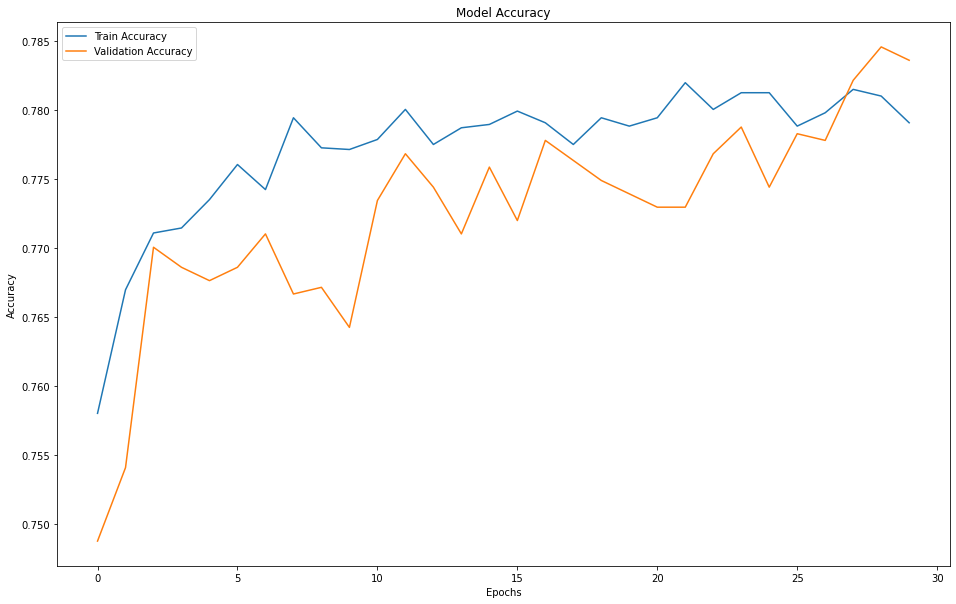

In [191]:
test_loss, test_accuracy = model_ANN.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

plt.figure(figsize=(16, 10))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [192]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[2])),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 64)             17920     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [193]:
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
259/259 [==============================] - 19s 23ms/step - loss: 0.5338 - accuracy: 0.7586 - val_loss: 0.4872 - val_accuracy: 0.7623
Epoch 2/50
259/259 [==============================] - 4s 14ms/step - loss: 0.4841 - accuracy: 0.7688 - val_loss: 0.4812 - val_accuracy: 0.7643
Epoch 3/50
259/259 [==============================] - 3s 12ms/step - loss: 0.4826 - accuracy: 0.7735 - val_loss: 0.4824 - val_accuracy: 0.7652
Epoch 4/50
259/259 [==============================] - 4s 16ms/step - loss: 0.4806 - accuracy: 0.7740 - val_loss: 0.4796 - val_accuracy: 0.7710
Epoch 5/50
259/259 [==============================] - 4s 15ms/step - loss: 0.4806 - accuracy: 0.7752 - val_loss: 0.4795 - val_accuracy: 0.7715
Epoch 6/50
259/259 [==============================] - 3s 13ms/step - loss: 0.4798 - accuracy: 0.7765 - val_loss: 0.4807 - val_accuracy: 0.7696
Epoch 7/50
259/259 [==============================] - 5s 19ms/step - loss: 0.4796 - accuracy: 0.7795 - val_loss: 0.4773 - val_accuracy: 0.772

65/65 [==============================] - 0s 6ms/step - loss: 0.4740 - accuracy: 0.7807
Test Accuracy: 0.7807


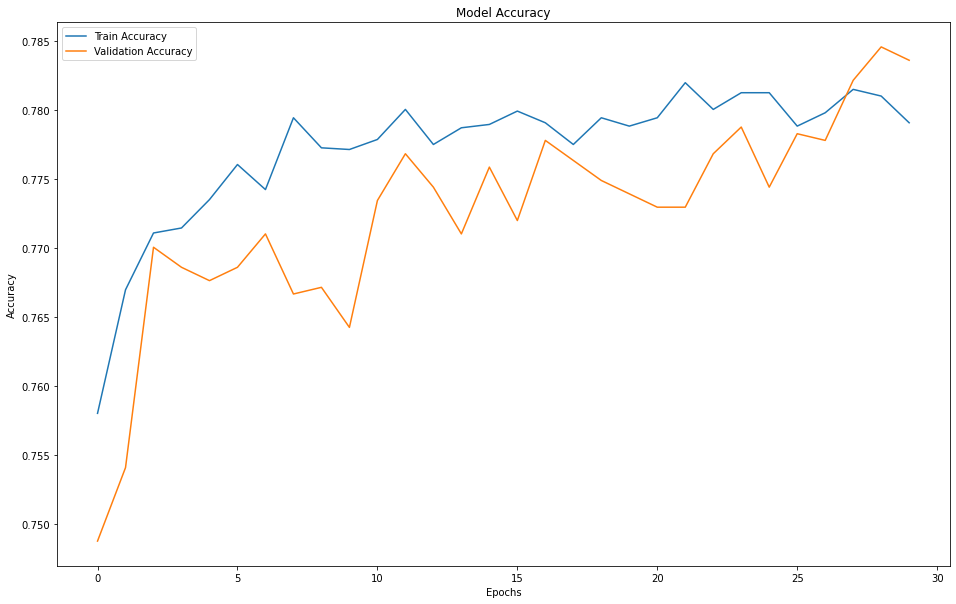

In [194]:
test_loss, test_accuracy = model_lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

plt.figure(figsize=(16, 10))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [195]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.GRU(64, return_sequences=True, input_shape=(1, X_train.shape[2])),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_gru.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 1, 64)             13632     
                                                                 
 gru_3 (GRU)                 (None, 32)                9408      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 23585 (92.13 KB)
Trainable params: 23585 (92.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [196]:
history_gru = model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
259/259 [==============================] - 17s 21ms/step - loss: 0.5123 - accuracy: 0.7540 - val_loss: 0.4896 - val_accuracy: 0.7498
Epoch 2/50
259/259 [==============================] - 3s 11ms/step - loss: 0.4848 - accuracy: 0.7682 - val_loss: 0.4849 - val_accuracy: 0.7662
Epoch 3/50
259/259 [==============================] - 3s 12ms/step - loss: 0.4824 - accuracy: 0.7740 - val_loss: 0.4829 - val_accuracy: 0.7667
Epoch 4/50
259/259 [==============================] - 4s 15ms/step - loss: 0.4815 - accuracy: 0.7760 - val_loss: 0.4811 - val_accuracy: 0.7691
Epoch 5/50
259/259 [==============================] - 4s 15ms/step - loss: 0.4806 - accuracy: 0.7742 - val_loss: 0.4786 - val_accuracy: 0.7575
Epoch 6/50
259/259 [==============================] - 3s 13ms/step - loss: 0.4807 - accuracy: 0.7772 - val_loss: 0.4822 - val_accuracy: 0.7657
Epoch 7/50
259/259 [==============================] - 3s 12ms/step - loss: 0.4794 - accuracy: 0.7788 - val_loss: 0.4799 - val_accuracy: 0.771

65/65 [==============================] - 0s 6ms/step - loss: 0.4731 - accuracy: 0.7797
Test Accuracy: 0.7797


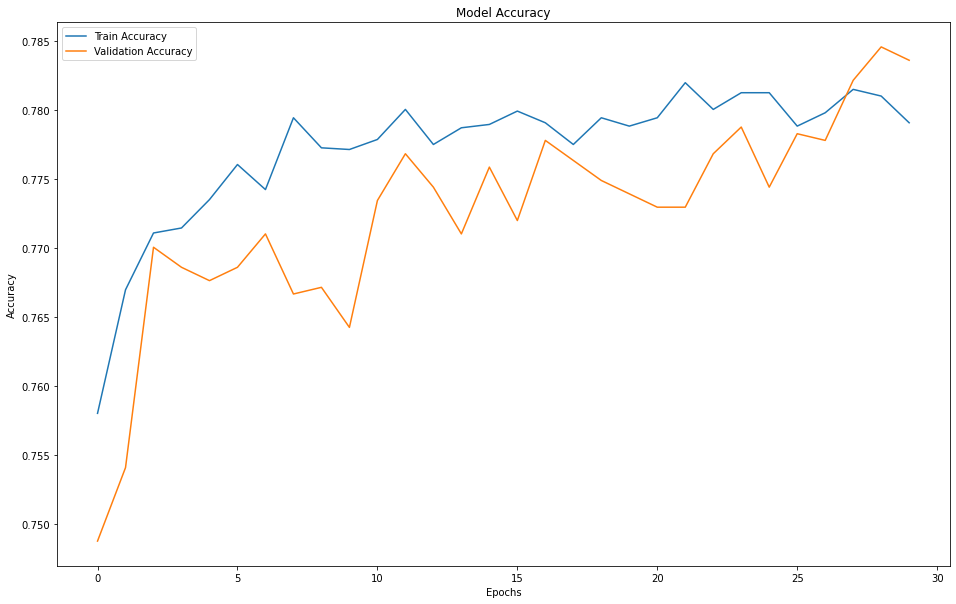

In [197]:
test_loss, test_accuracy = model_gru.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

plt.figure(figsize=(16, 10))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [198]:
test_loss_gru, test_accuracy_gru = model_gru.evaluate(X_test, y_test)
print(f"GRU - Test Loss: {test_loss_gru}, Test Accuracy: {test_accuracy_gru}")

test_loss_lstm, test_accuracy_lstm = model_lstm.evaluate(X_test, y_test)
print(f"LSTM - Test Loss: {test_loss_lstm}, Test Accuracy: {test_accuracy_lstm}")

test_loss_ANN, test_accuracy_ANN = model_ANN.evaluate(X_test, y_test)
print(f"ANN - Test Loss: {test_loss_ANN}, Test Accuracy: {test_accuracy_ANN}")

65/65 [==============================] - 1s 7ms/step - loss: 0.4731 - accuracy: 0.7797
GRU - Test Loss: 0.4731177091598511, Test Accuracy: 0.7797101736068726
65/65 [==============================] - 0s 7ms/step - loss: 0.4740 - accuracy: 0.7807
LSTM - Test Loss: 0.4739767014980316, Test Accuracy: 0.7806763052940369
65/65 [==============================] - 1s 5ms/step - loss: 0.4734 - accuracy: 0.7773
ANN - Test Loss: 0.4734342098236084, Test Accuracy: 0.7772946953773499


# I hope you like it.